In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
df =pd.read_csv(r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv", header=0)
df

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,234,234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,235,235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,236,236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0


In [3]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [4]:
df.tail(10)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
228,228,228,HP,2,2,1,5,12.5,0.793103,8,256,2.77830,2120,Medium,1,0
229,229,229,Dell,4,2,1,5,14.0,0.862069,8,256,2.99880,2082,Medium,1,0
230,230,230,Dell,4,2,1,5,15.6,0.862069,8,256,2.99880,1870,Medium,1,0
231,231,231,Dell,4,2,1,7,14.0,0.965517,8,256,2.99880,2255,Medium,1,0
232,232,232,Toshiba,3,2,1,5,13.3,0.793103,8,256,2.64600,1855,Medium,1,0
233,233,233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,234,234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,235,235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,236,236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0
237,237,237,Toshiba,3,2,1,5,14.0,0.793103,8,256,4.29975,1499,Low,1,0


In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      238 non-null    int64  
 1   Unnamed: 0        238 non-null    int64  
 2   Manufacturer      238 non-null    object 
 3   Category          238 non-null    int64  
 4   GPU               238 non-null    int64  
 5   OS                238 non-null    int64  
 6   CPU_core          238 non-null    int64  
 7   Screen_Size_inch  238 non-null    float64
 8   CPU_frequency     238 non-null    float64
 9   RAM_GB            238 non-null    int64  
 10  Storage_GB_SSD    238 non-null    int64  
 11  Weight_pounds     238 non-null    float64
 12  Price             238 non-null    int64  
 13  Price-binned      238 non-null    object 
 14  Screen-Full_HD    238 non-null    int64  
 15  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(11), object(2)
memory u

In [7]:
df.describe(include = 'all')

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238.000000,238.000000
unique,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,118.500000,118.500000,NaN,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,0.676471,0.323529
std,68.848868,68.848868,NaN,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,0.468809,0.468809
min,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,0.000000,0.000000
25%,59.250000,59.250000,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,0.000000,0.000000
50%,118.500000,118.500000,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,1.000000,0.000000
75%,177.750000,177.750000,NaN,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,1.000000,1.000000


In [8]:
df.isnull() .sum

<bound method DataFrame.sum of      Unnamed: 0.1  Unnamed: 0  Manufacturer  Category    GPU     OS  CPU_core  \
0           False       False         False     False  False  False     False   
1           False       False         False     False  False  False     False   
2           False       False         False     False  False  False     False   
3           False       False         False     False  False  False     False   
4           False       False         False     False  False  False     False   
..            ...         ...           ...       ...    ...    ...       ...   
233         False       False         False     False  False  False     False   
234         False       False         False     False  False  False     False   
235         False       False         False     False  False  False     False   
236         False       False         False     False  False  False     False   
237         False       False         False     False  False  False     False 

In [9]:
df_filled = df.fillna(0)
print(df_filled)

     Unnamed: 0.1  Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  \
0               0           0         Acer         4    2   1         5   
1               1           1         Dell         3    1   1         3   
2               2           2         Dell         3    1   1         7   
3               3           3         Dell         4    2   1         5   
4               4           4           HP         4    2   1         7   
..            ...         ...          ...       ...  ...  ..       ...   
233           233         233       Lenovo         4    2   1         7   
234           234         234      Toshiba         3    2   1         5   
235           235         235       Lenovo         4    2   1         5   
236           236         236       Lenovo         3    3   1         5   
237           237         237      Toshiba         3    2   1         5   

     Screen_Size_inch  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  \
0                14.

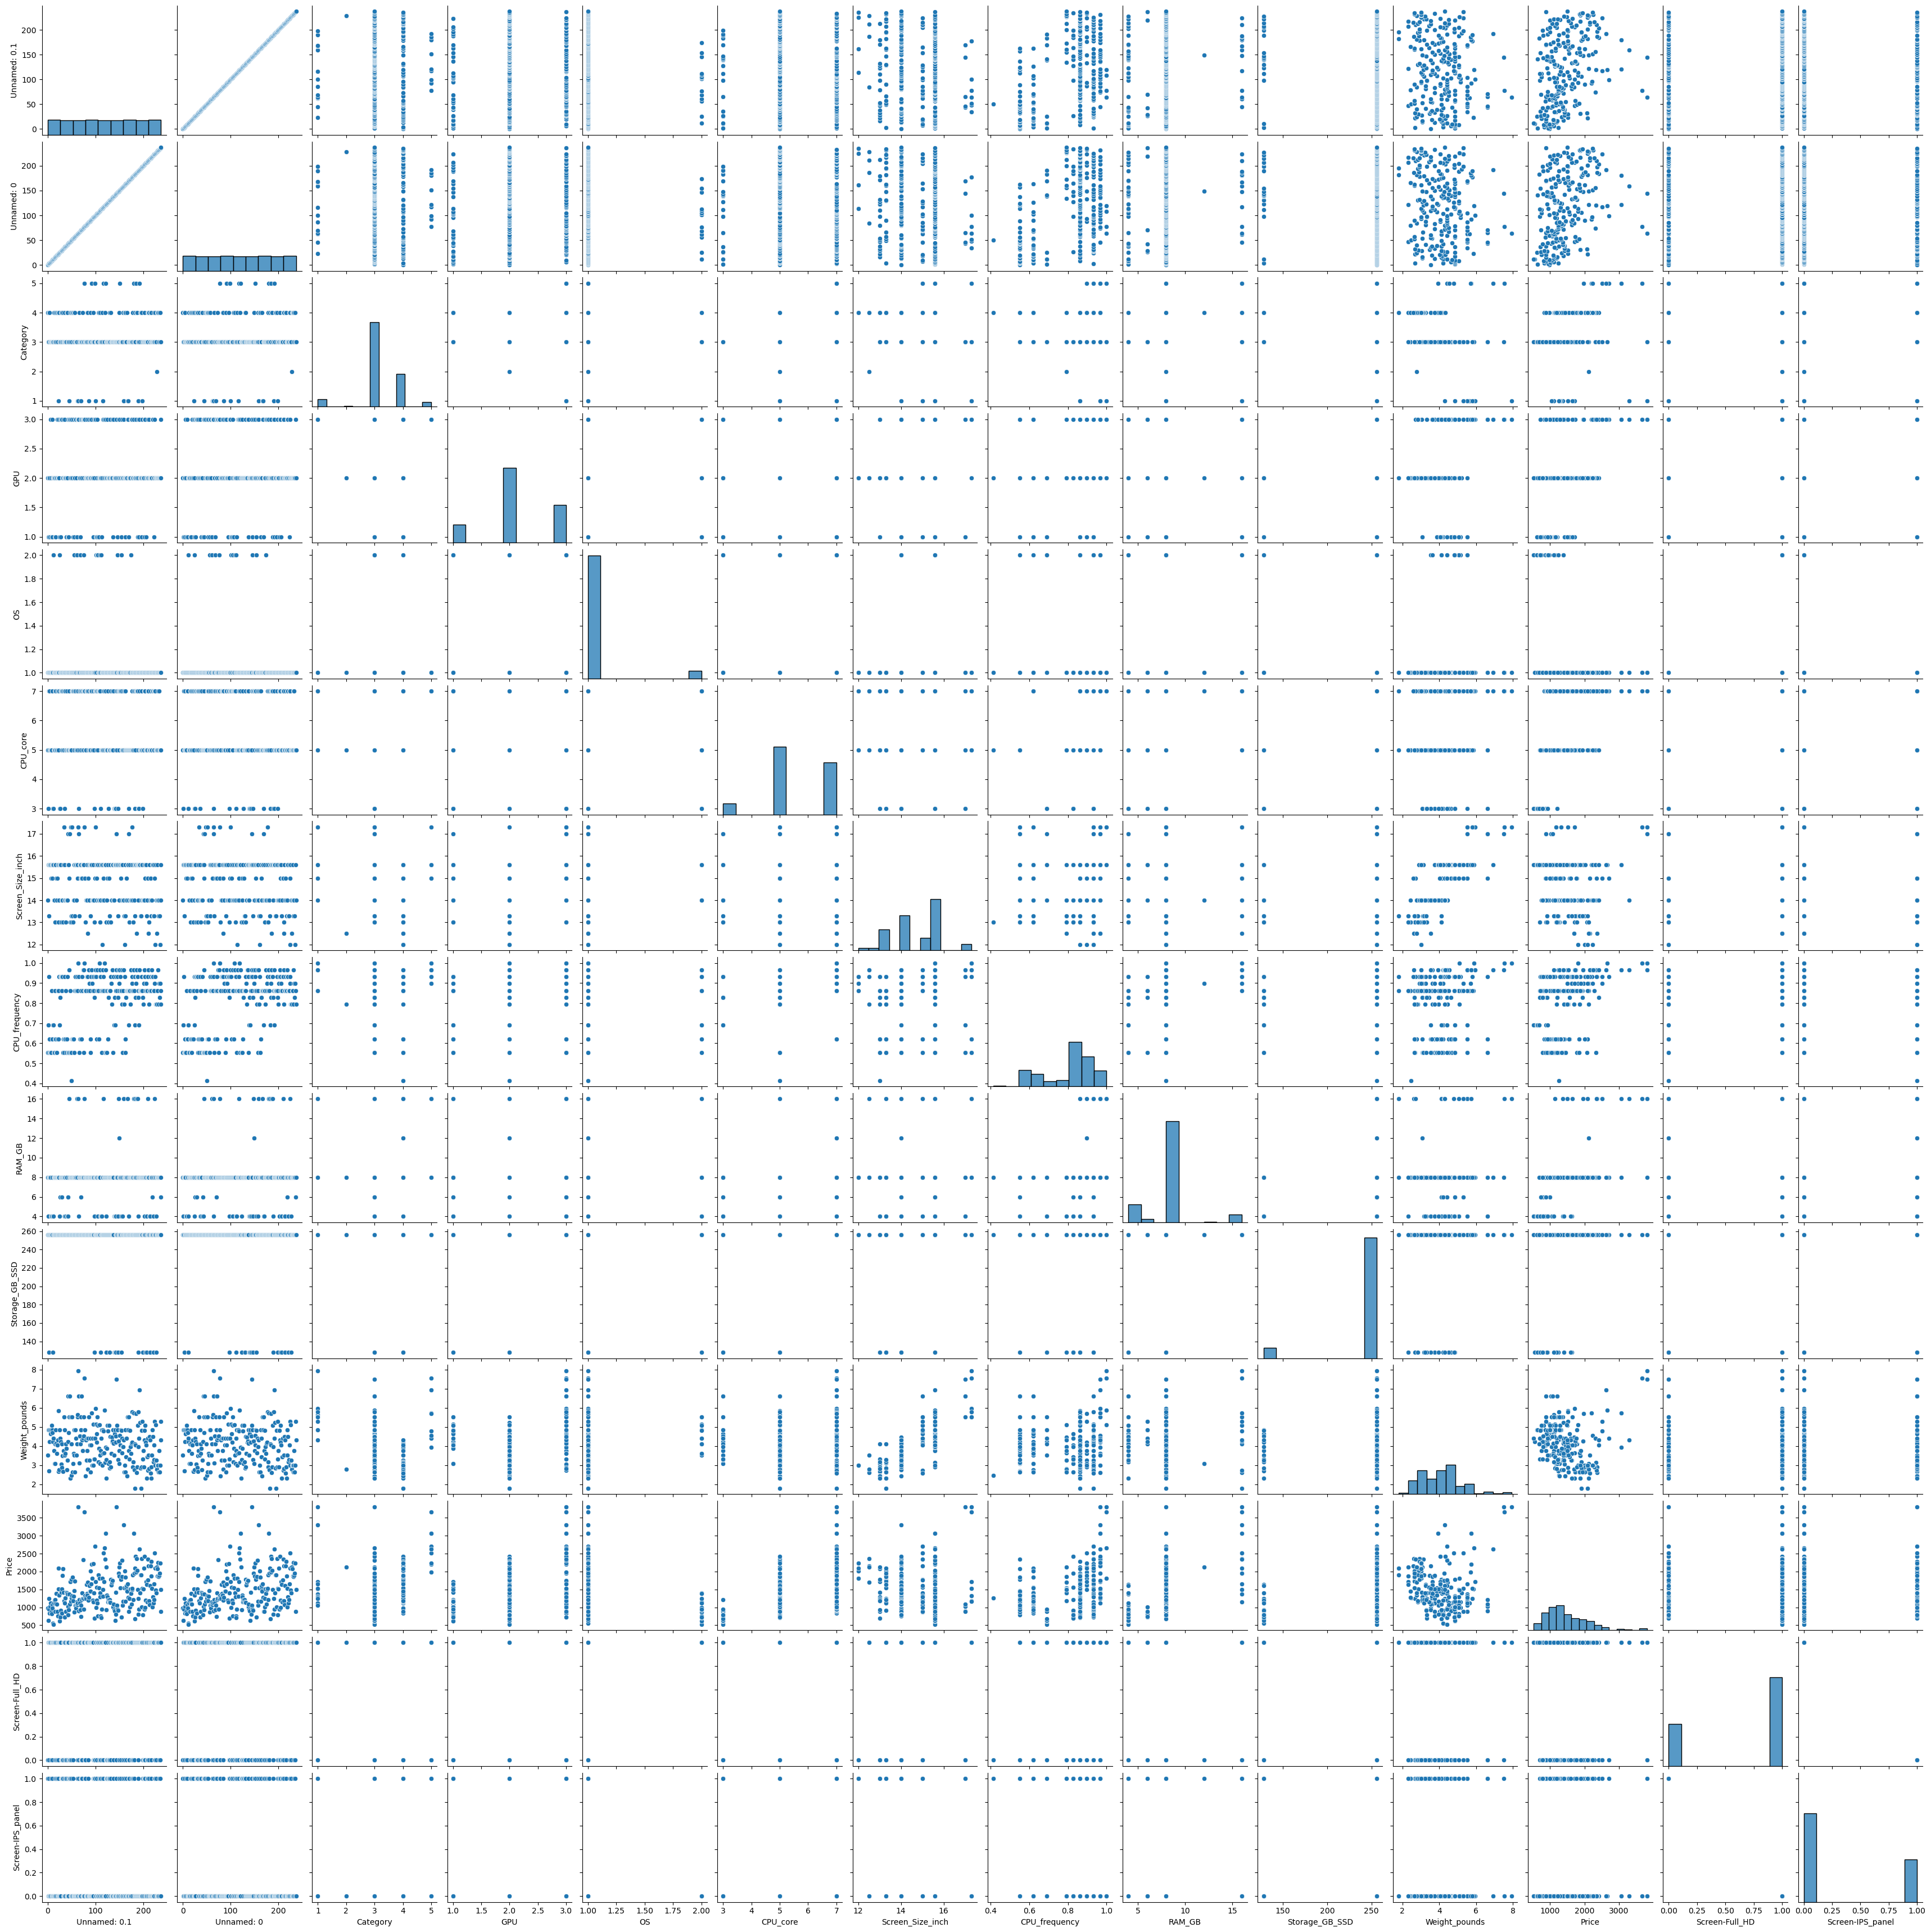

In [10]:
sns.pairplot(df)

In [11]:
print(df.dtypes)

Unnamed: 0.1          int64
Unnamed: 0            int64
Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object


In [12]:
print(df.isnull().sum())

Unnamed: 0.1        0
Unnamed: 0          0
Manufacturer        0
Category            0
GPU                 0
OS                  0
CPU_core            0
Screen_Size_inch    0
CPU_frequency       0
RAM_GB              0
Storage_GB_SSD      0
Weight_pounds       0
Price               0
Price-binned        0
Screen-Full_HD      0
Screen-IPS_panel    0
dtype: int64


In [13]:
df =df.dropna()
df

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,234,234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,235,235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,236,236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0


In [14]:
df =df.fillna(0)
df

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,234,234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,235,235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,236,236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0


In [15]:
df['Screen_Size_inch'].value_counts()

Screen_Size_inch
15.6    93
14.0    64
15.0    23
13.3    20
13.0    18
17.3     7
17.0     5
12.5     4
12.0     4
Name: count, dtype: int64

In [16]:
df.groupby('Screen_Size_inch')

In [17]:
X = df[['Screen_Size_inch', 'CPU_frequency']]
Y = df['Price']

lm = LinearRegression()
lm.fit(X, Y)


LinearRegression()

In [18]:
Yhat = lm.predict(X)

In [19]:
mse_slr = mean_squared_error(Y, Yhat)
r2_score_slr = lm.score(X, Y)

In [20]:
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.14660898819666102
The mean square error of price and predicted value is:  280583.63303918205


In [21]:
print(len(X))
print(len(Y))


238
238


In [22]:
X = data[['Category']]
y = data['CPU_frequency']
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())])


NameError: name 'data' is not defined